# Navy Seal Burpees

### Progress on Track

#### Funções:

Importação de Bibliotecas e Carregamento de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Caminhos para os arquivos CSV de backup
caminhos_backup = {
    2022: 'E:\\Documentos\\Navy Seal Burpees\\backup\\totais_mensais_2022_backup.csv',
    2023: 'E:\\Documentos\\Navy Seal Burpees\\backup\\totais_mensais_2023_backup.csv',
    2024: 'E:\\Documentos\\Navy Seal Burpees\\backup\\totais_mensais_2024_backup.csv'
}

def carregar_totais_csv(caminho):
    """
    Carrega os totais mensais de um arquivo CSV.
    """
    if os.path.exists(caminho):
        df_totais = pd.read_csv(caminho)
        return df_totais.set_index('Mes')['Total'].to_dict()
    return {}

# Carregar totais dos arquivos de backup
totais_mensais = {}
for ano, caminho in caminhos_backup.items():
    totais_mensais.update(carregar_totais_csv(caminho))


Função para Plotar Gráfico Anual

In [2]:
def plotar_grafico_anual(ano):
    """
    Gera um gráfico anual com o total de NSB para cada mês do ano especificado e apresenta o total realizado no ano.
    """
    totais_ano = {mes: total for mes, total in totais_mensais.items() if mes.startswith(str(ano))}
    if not totais_ano:
        print(f"Nenhum dado mensal disponível para {ano}.")
        return
    
    meses, totais = list(totais_ano.keys()), list(totais_ano.values())
    plt.figure(figsize=(12, 6))
    barras = plt.bar(meses, totais, color='#1f77b4', edgecolor='black')
    total_ano = sum(totais)
    plt.title(f'Navy Seal Burpees ({ano}) - Total: {total_ano}', fontsize=16, weight='bold')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), f'{barra.get_height()}', ha='center', va='bottom', fontsize=12)
    
    plt.show()


Função para Plotar Gráfico Total

In [3]:
def plotar_grafico_total(anos=None):
    """
    Gera um gráfico combinado com os totais mensais de NSB dos anos especificados.
    Se 'anos' contiver 'todos', plota todos os anos disponíveis.
    """
    if anos == ["todos"]:
        anos = sorted({mes[:4] for mes in totais_mensais.keys()})
    
    meses = [f'{mes:02d}' for mes in range(1, 13)]
    plt.figure(figsize=(12, 6))
    
    for ano in anos:
        totais_ano = [totais_mensais.get(f'{ano}-{mes}', 0) for mes in meses]
        total_ano = sum(totais_ano)
        plt.plot(meses, totais_ano, marker='o', label=f'{ano} ({total_ano})', linewidth=2, markersize=6)
        
        for mes, total in zip(meses, totais_ano):
            plt.text(mes, total, f'{total}', ha='center', va='bottom', fontsize=10)
    
    plt.title('Navy Seal Burpees - Comparação Anual', fontsize=16, weight='bold')
    plt.legend(title='', fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()


Função para Plotar Totais Anuais

In [4]:
def plotar_totais_anuais():
    """
    Gera um gráfico com os totais anuais de NSBs realizados.
    """
    totais_por_ano = {}
    for chave, valor in totais_mensais.items():
        ano = chave[:4]
        totais_por_ano[ano] = totais_por_ano.get(ano, 0) + valor
    
    anos, totais = list(totais_por_ano.keys()), list(totais_por_ano.values())
    plt.figure(figsize=(12, 6))
    barras = plt.bar(anos, totais, color='#1f77b4', edgecolor='black')
    plt.title('Navy Seal Burpees - Total por Ano', fontsize=16, weight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(), f'{barra.get_height()}', ha='center', va='bottom', fontsize=12)
    
    plt.show()


## Annual Comparison

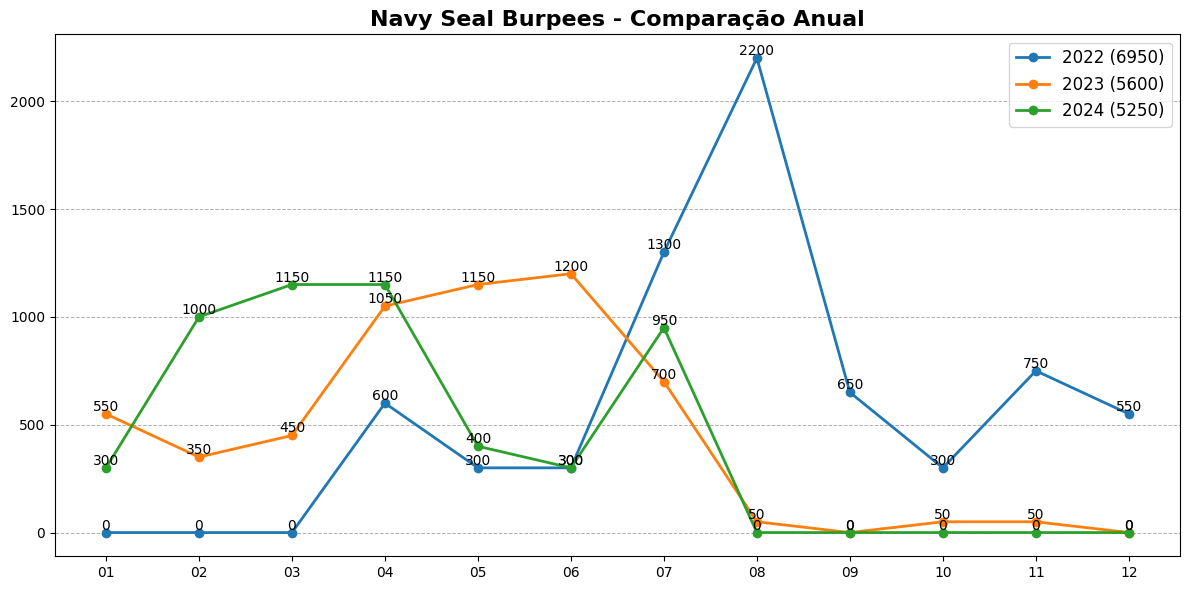

In [5]:
plotar_grafico_total(anos=['todos'])
# plotar_grafico_total(anos=['2023', '2024'])

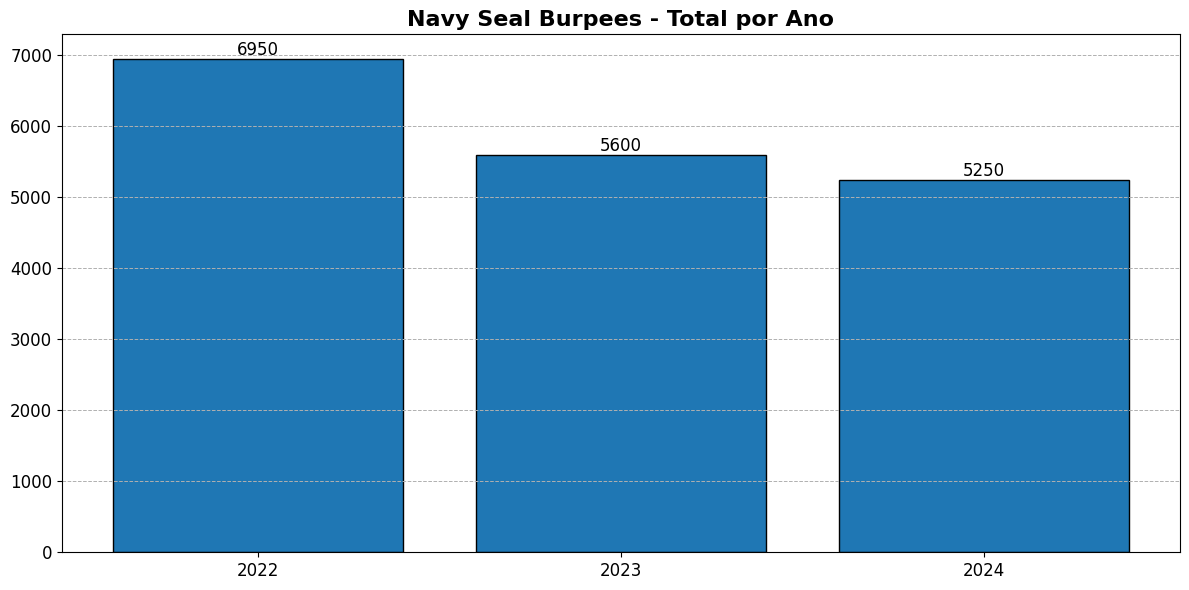

In [6]:
plotar_totais_anuais()

## Per Annum

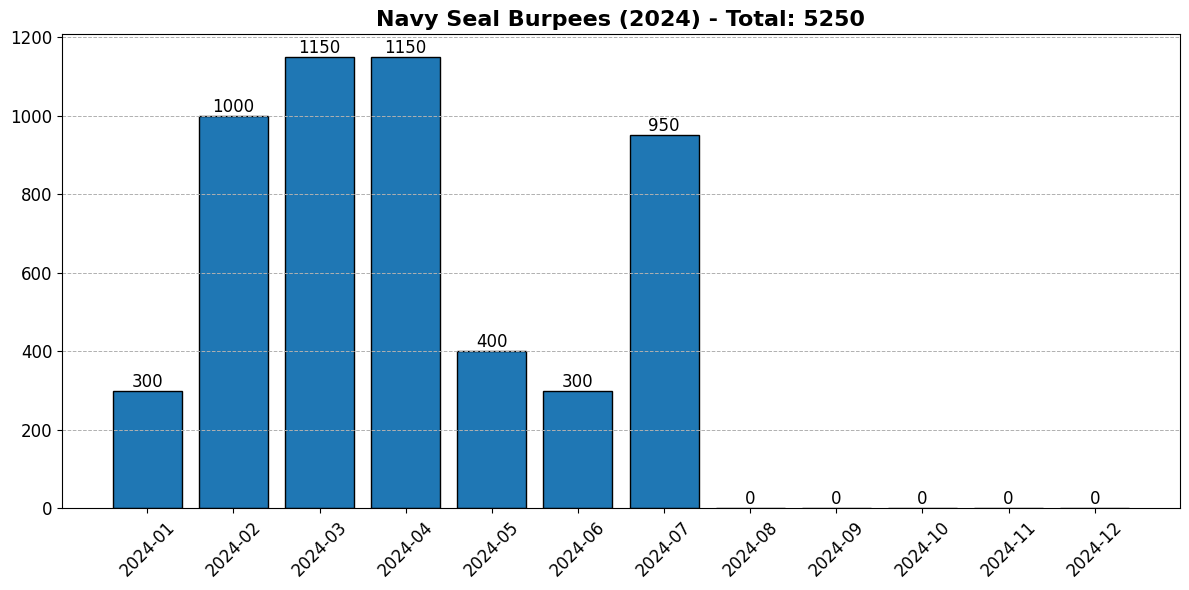

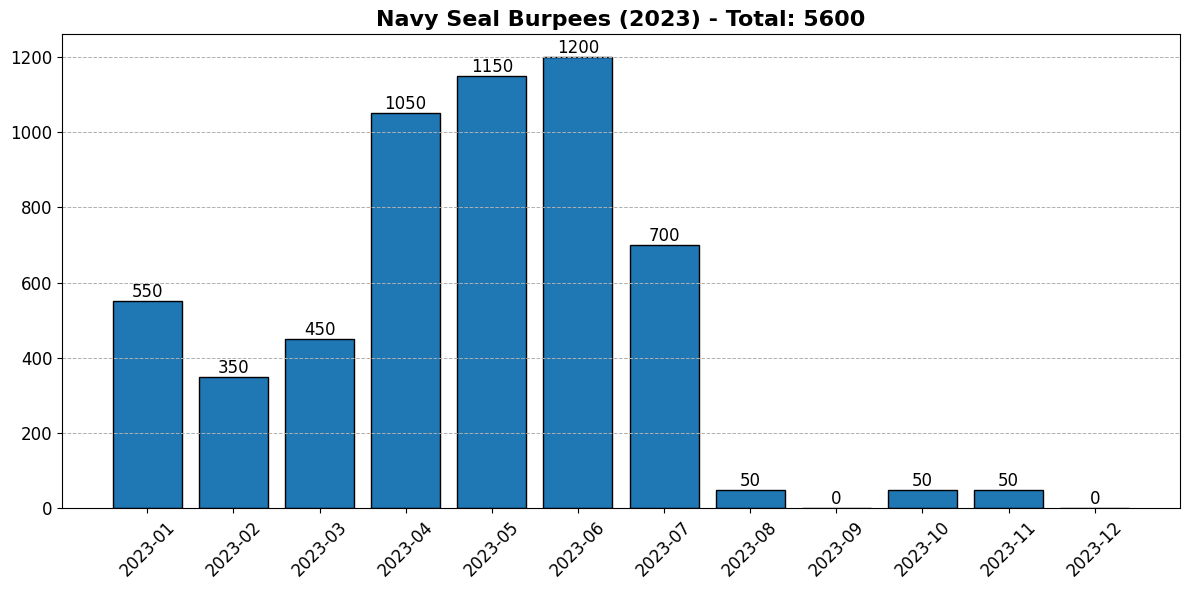

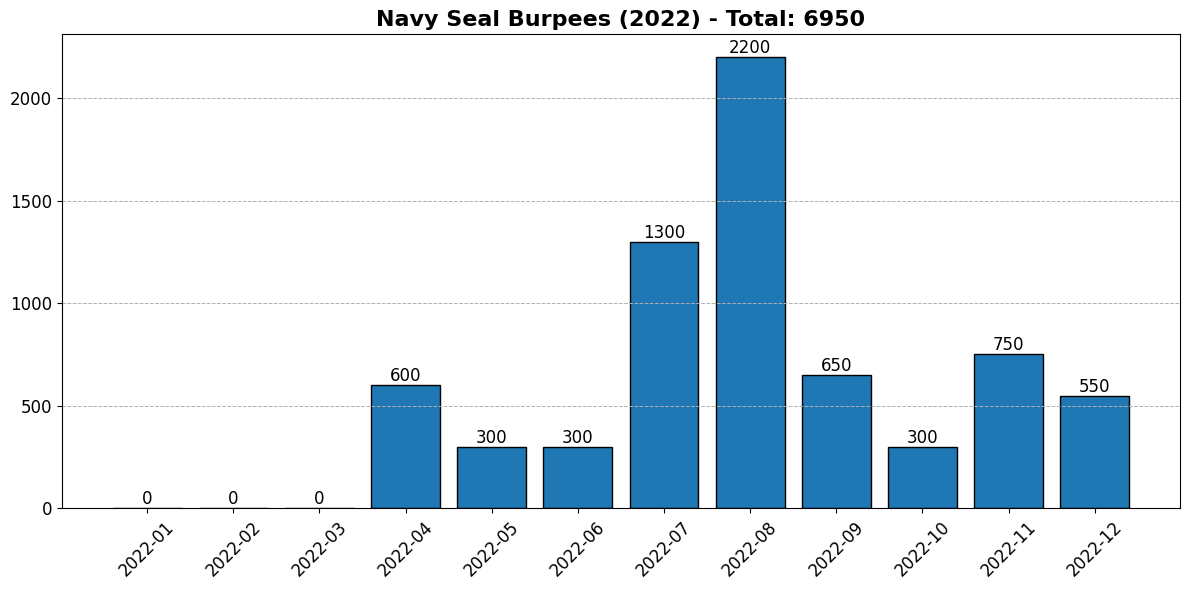

In [7]:
for ano in [2024, 2023, 2022]:
    plotar_grafico_anual(ano)